# Pandas Series

![pandas](images/pandas.png "Pandas Logo")


- Started by Wes MacKinney with a first release in 2011.
- Based on NumPy, it is the most used library for all things data.
- Motivated by the toolbox in R for manipulating data easily.
- A lot of names in Pandas come from R world.
- It is Open source (BSD)

https://pandas.pydata.org/

```python
import pandas as pd
```

"*Pandas provides high-performance, easy-to-use data structures
and data analysis tools in Python*"

- Self-describing data structures
- Data loaders to/from common file formats
- Plotting functions
- Basic statistical tools.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option("display.max_rows", 8)
plt.rcParams['figure.figsize'] = (9, 6)

## [Series](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#series)

- A Series contains a one-dimensional array of data, *and* an associated sequence of labels called the *index*.
- The index can contain numeric, string, or date/time values.
- When the index is a time value, the series is a [time series](https://en.wikipedia.org/wiki/Time_series).
- The index must be the same length as the data.
- If no index is supplied it is automatically generated as `range(len(data))`.

In [2]:
pd.Series([1,3,5,np.nan,6,8], dtype=np.float64)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
pd.Series(index=pd.period_range('09/11/2017', '09/18/2017', freq="D"), dtype=np.int8)

2017-09-11   NaN
2017-09-12   NaN
2017-09-13   NaN
2017-09-14   NaN
2017-09-15   NaN
2017-09-16   NaN
2017-09-17   NaN
2017-09-18   NaN
Freq: D, dtype: float64

### Exercise
- Create a text with `lorem` and count word occurences with a `collection.Counter`. Put the result in a `dict`.
- lorem을 사용하여 텍스트를 생성하고 collection.Counter를 사용하여 단어 발생 횟수를 계산합니다. 결과를 dict에 넣습니다

In [4]:
pip install lorem

In [5]:
import lorem
from collections import Counter

# lorem 텍스트 생성
text = lorem.paragraph()

# collection.Counter를 사용하여 단어 발생 횟수 계산
word_counts = Counter(text.split())

# 결과를 딕셔너리에 저장
result_dict = dict(word_counts)

# 딕셔너리 출력
result_dict

{'Modi': 1,
 'tempora': 2,
 'labore': 3,
 'dolorem.': 1,
 'Adipisci': 1,
 'voluptatem': 1,
 'sit': 1,
 'amet': 1,
 'dolore': 1,
 'neque.': 1,
 'Est': 1,
 'quiquia': 1,
 'eius': 1,
 'dolorem': 1,
 'sit.': 1,
 'Labore': 1,
 'consectetur': 1,
 'quisquam': 1,
 'etincidunt': 1,
 'quaerat': 1,
 'consectetur.': 1,
 'Velit': 1,
 'sed': 1,
 'dolor': 1,
 'sed.': 1}

### Exercise
- From the results create a Pandas series name latin_series with words in alphabetical order as index.
- 결과에서 알파벳 순으로 정렬된 Pandas Series인 latin_series를 만듭니다.

In [6]:
# 결과를 사용하여 알파벳 순서로 정렬된 Pandas Series 생성
latin_series = pd.Series(word_counts).sort_index()

# Pandas Series 출력
latin_series

Adipisci      1
Est           1
Labore        1
Modi          1
             ..
sit           1
sit.          1
tempora       2
voluptatem    1
Length: 25, dtype: int64

In [7]:
#df = pd.Series(result)
# df

### Exercise

- Plot the series using 'bar' kind.
- 'bar' 종류를 사용하여 Series를 플로팅합니다.

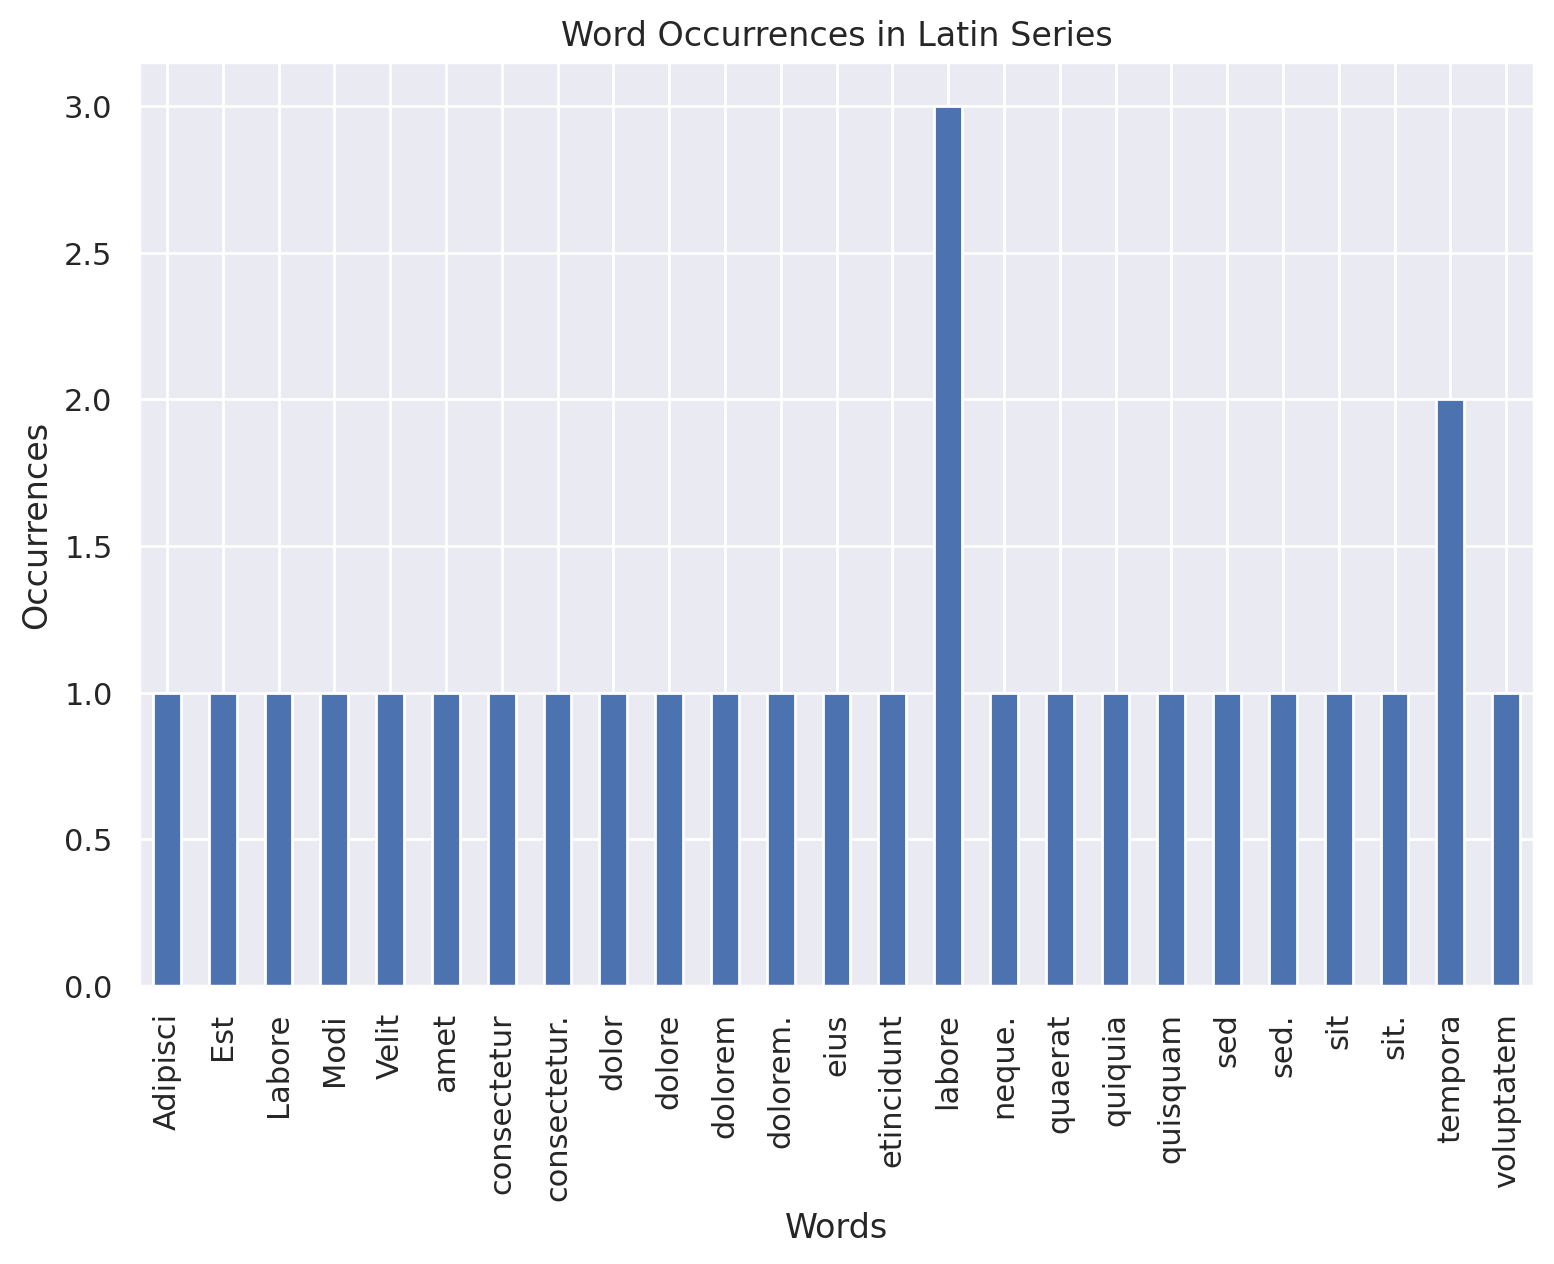

In [8]:
# 'bar' 종류를 사용하여 시리즈를 표기
latin_series.plot(kind='bar')
plt.title('Word Occurrences in Latin Series')
plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.show()

### Exercise
- Pandas provides explicit functions for indexing `loc` and `iloc`.
    - Use `loc` to display the number of occurrences of 'dolore'.
    - Use `iloc` to diplay the number of occurrences of the last word in index.
- Pandas는 인덱싱을위한 명시적 함수 loc 및 iloc을 제공합니다.
    - dolore'의 발생 횟수를 표시하려면 loc를 사용하십시오.
    - 마지막 단어의 발생 횟수를 표시하려면 iloc를 사용하십시오.

In [9]:
print(latin_series.index)

Index(['Adipisci', 'Est', 'Labore', 'Modi', 'Velit', 'amet', 'consectetur',
       'consectetur.', 'dolor', 'dolore', 'dolorem', 'dolorem.', 'eius',
       'etincidunt', 'labore', 'neque.', 'quaerat', 'quiquia', 'quisquam',
       'sed', 'sed.', 'sit', 'sit.', 'tempora', 'voluptatem'],
      dtype='object')


In [10]:
# loc을 사용하여 'dolore'의 발생 횟수를 표시
if 'dolore' in latin_series.index:
    occurrences_dolore = latin_series.loc['dolore']
    print(f"'dolore'의 발생 횟수: {occurrences_dolore}")
else:
    print("'dolore'는 라틴 시리즈에 존재하지 않습니다.")

'dolore'의 발생 횟수: 1


In [11]:
# 인덱스의 마지막 단어의 발생 횟수를 표시
occurrences_last_word = latin_series.iloc[-1]
print(f"마지막 단어의 발생 횟수: {occurrences_last_word}")

마지막 단어의 발생 횟수: 1


### Exercise
- Sort words by number of occurrences.
- Plot the Series.

- 단어를 발생 횟수로 정렬합니다.
- 시리즈를 플로팅합니다.

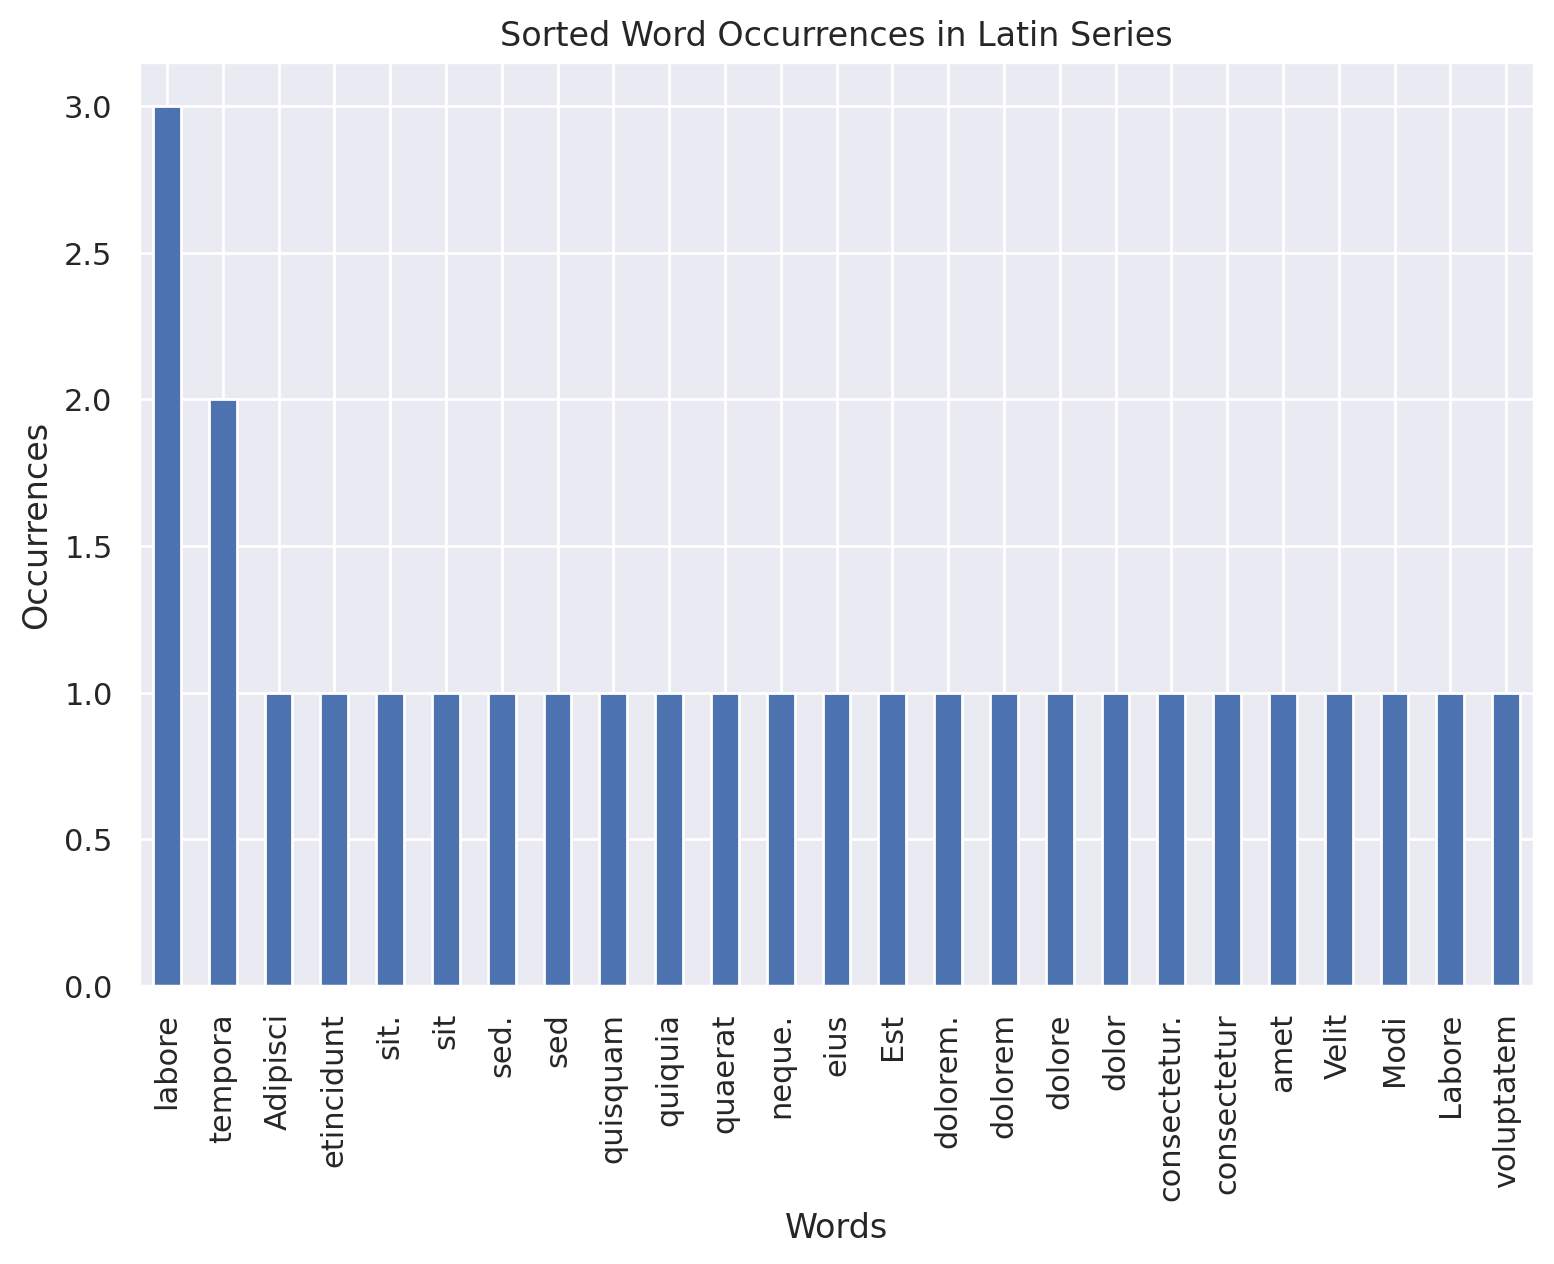

In [12]:
# 단어를 발생 횟수별로 정렬하고 시리즈를 표시
sorted_latin_series = latin_series.sort_values(ascending=False)
sorted_latin_series.plot(kind='bar')
plt.title('Sorted Word Occurrences in Latin Series')
plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.show()

### Full globe temperature between 1901 and 2000.

We read the text file and load the results in a pandas dataframe.
In cells below you need to clean the data and convert the dataframe to a time series.

In [14]:
import os
here = os.getcwd()

filename = os.path.join(here,"data","/content/sample_data/monthly.land.90S.90N.df_1901-2000mean.dat.txt")

df = pd.read_table(filename, sep="\s+",
                   names=["year", "month", "mean temp"])
df

,year,month,mean temp
0,1880,1,-0.0235
1,1880,2,-0.4936
2,1880,3,-0.6785
3,1880,4,-0.2829
...,...,...,...
1580,2011,9,-999.0000
1581,2011,10,-999.0000
1582,2011,11,-999.0000
1583,2011,12,-999.0000


### Exercise
- Insert a third column with value one named "day" with `.insert`.
- convert df index to datetime with `pd.to_datetime` function.
- convert df to Series containing only "mean temp" column.

- `.insert`를 사용하여 "day"라는 이름의 세 번째 열에 값을 하나 넣습니다.
- pd.to_datetime 함수로 df 인덱스를 datetime으로 변환합니다.
- df를 "mean temp" 열만 포함 된 Series로 변환합니다.

In [15]:
# 세 번째 열을 추가, 이름이 "day"로 값이 1
df.insert(2, "day", 1)

# 인덱스를 날짜 시간으로 변환합니다.
df.index = pd.to_datetime(df[["year", "month", "day"]])

# 시리즈로 변환합니다.
temperature_series = df["mean temp"]

In [16]:
df

,year,month,day,mean temp
1880-01-01,1880,1,1,-0.0235
1880-02-01,1880,2,1,-0.4936
1880-03-01,1880,3,1,-0.6785
1880-04-01,1880,4,1,-0.2829
...,...,...,...,...
2011-09-01,2011,9,1,-999.0000
2011-10-01,2011,10,1,-999.0000
2011-11-01,2011,11,1,-999.0000
2011-12-01,2011,12,1,-999.0000


### Exercise
- Display the beginning of the file with `.head`.
- `.head`를 사용하여 파일의 처음 부분을 표시합니다

In [17]:
print(df.head())

            year  month  day  mean temp
1880-01-01  1880      1    1    -0.0235
1880-02-01  1880      2    1    -0.4936
1880-03-01  1880      3    1    -0.6785
1880-04-01  1880      4    1    -0.2829
1880-05-01  1880      5    1    -0.1261


### Exercise
- Display the end of the file with `.tail`.
- `.tail`를 사용하여 파일의 끝 부분을 표시합니다.

In [18]:
print(df.tail())

            year  month  day  mean temp
2011-08-01  2011      8    1     -999.0
2011-09-01  2011      9    1     -999.0
2011-10-01  2011     10    1     -999.0
2011-11-01  2011     11    1     -999.0
2011-12-01  2011     12    1     -999.0


In the dataset, -999.00 was used to indicate that there was no value for that year.

데이터 세트에서는 -999.00이 해당 연도에 대한 값이 없음을 나타내는 데 사용되었습니다.

### Exercise

- Display values equal to -999 with `.values`.
- Replace the missing value (-999.000) by `np.nan`

- `.values`를 사용하여 -999와 같은 값 표시합니다.
- 누락 된 값 (-999.000)을 np.nan으로 대체하십시오.


In [19]:
print(df.values[df.values == -999])

# -999 누락 값을 np.nan으로 대체
df.replace(-999, np.nan, inplace=True)

[-999. -999. -999. -999. -999. -999.]


Once they have been converted to np.nan, missing values can be removed (dropped).

한 번에 np.nan으로 변환되면 누락 된 값이 제거 (삭제) 될 수 있습니다.


### Exercise
- Remove missing values with `.dropna`.
-`.dropna`를 사용하여 누락 된 값 제거

In [20]:
df.dropna(inplace=True)

### Exercise
- Generate a basic visualization using `.plot`.
- `.plot`을 사용하여 기본 시각화 생성

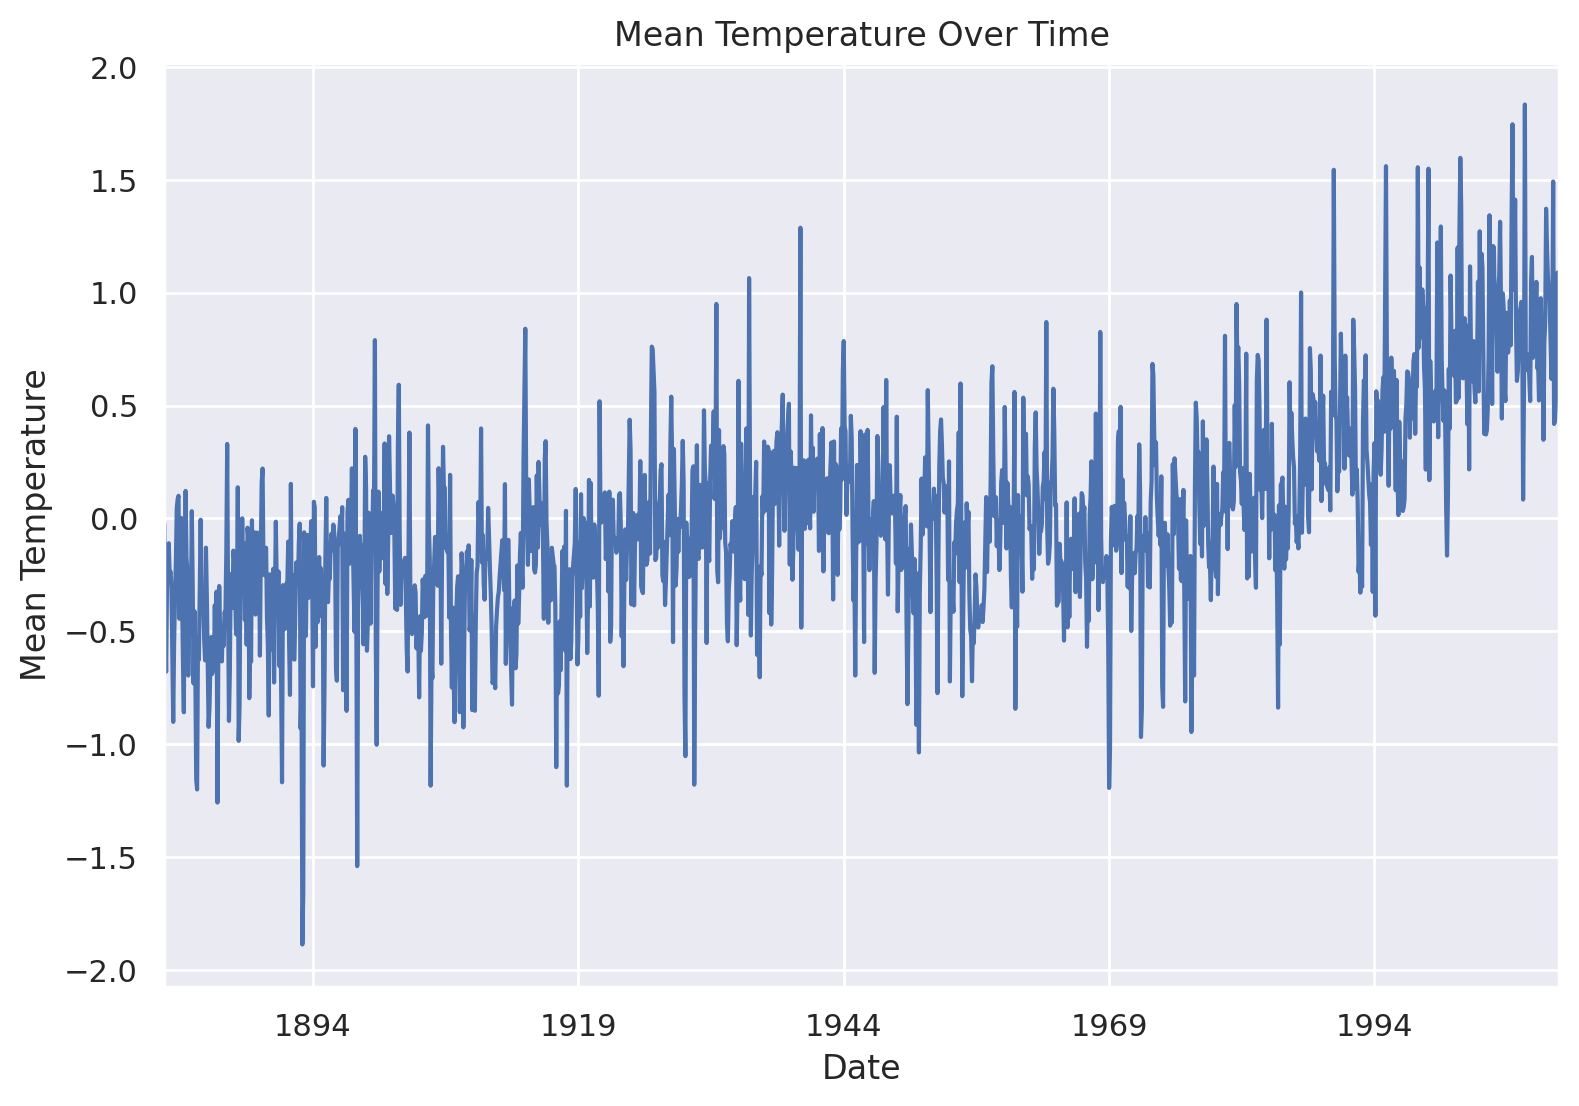

In [21]:
df["mean temp"].plot()
plt.title("Mean Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

### Exercise

Convert df index from timestamp to period is more meaningfull since it was measured and averaged over the month. Use `to_period` method.


df의 인덱스를 timestamp에서 period로 변환하면 월에 걸쳐 측정 및 평균화되었으므로 더 의미 있습니다. `to_period` 메서드를 사용하십시오.

In [22]:
# 인덱스를 timestamp에서 period로 변환합니다.
df.index = df.index.to_period("M")

## Resampling

Series can be resample, downsample or upsample.
- Frequencies can be specified as strings: "us", "ms", "S", "T", "H", "D", "B", "W", "M", "A", "3min", "2h20", ...
- More aliases at http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

시리즈는 리샘플링, 다운 샘플링 또는 업 샘플링 할 수 있습니다.

주파수는 문자열로 지정할 수 있습니다. "us", "ms", "S", "T", "H", "D", "B", "W", "M", "A", "3min", "2h20" 등
http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases에서 더 많은 별칭

### Exercise

- With `resample` method, convert df Series to 10 year blocks:
- `resample` 메서드를 사용하여 df 시리즈를 10 년 블록으로 변환하십시오.

In [24]:
df_resampled = df.resample('M')
df_resampled

### Saving Work

[HDF5](https://support.hdfgroup.org/HDF5/) is widely used and one of the most powerful file format to store binary data. It allows to store both Series and DataFrames.

HDF5는 광범위하게 사용되며 이진 데이터를 저장하는 가장 강력한 파일 형식 중 하나입니다. Series 및 DataFrame 모두를 저장할 수 있습니다.

In [26]:
with pd.HDFStore("/content/sample_data/pandas_series.h5") as writer:
    df.to_hdf(writer, "/content/sample_data/temperatures/full_globe")

### Reloading data

In [27]:
with pd.HDFStore("/content/sample_data/pandas_series.h5") as store:
    df = store["/content/sample_data/temperatures/full_globe"]